# Lecture 3: Classification / Regression

In [2]:
# import some of our best friends
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# package for running regressions
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

### Ordinary Least Square

In [18]:
# create artificial dataset (like in lecture 1)
nsamples = 50
y1 = np.random.randn(nsamples) * 5 + 50
y2 = y1 + 30 + np.random.randn(nsamples)*3 # each y2 sample is generated based on corresponding y2 sample

In [19]:
# reshape y1, y2 for the model
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)

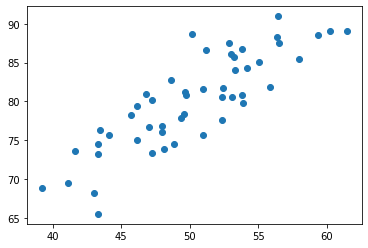

In [20]:
# check data
plt.scatter(y1,y2);

In [21]:
# run linear regression
reg = LinearRegression()
reg.fit(y1,y2)

LinearRegression()

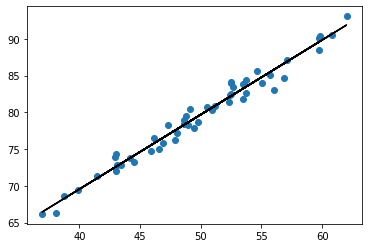

In [79]:
# plot line
fig,ax = plt.subplots()
ax.scatter(y1,y2);
ax.plot(y1, (reg.intercept_ + reg.coef_ * y1).reshape(-1),'k-');

In [80]:
# testing how good the regression is
reg.score(y1,y2)

0.973079304443047

Other options for running linear regression
1. np.polyfit
2. ordinary least square
3. sns.regplot

In [28]:
# solve with linear algebra
X = np.concatenate((np.ones((50,1)),y1),axis=1)
B = np.linalg.inv(X.T@X) @ X.T @ y2
print(B)

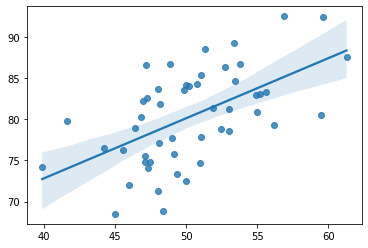

In [8]:
# plotting with sns
ax = sns.regplot(x = y1, y = y2);

### Ridge Regression

In [35]:
# this time generate multiple dimensions of input
n_samples, n_features = 50, 3
X = np.random.randn(n_samples, n_features)

# imaginary coefficient (with the first one as intercept)
w = np.array([5.5, 1, -3, 0])

# calculate y based on imaginary
y = np.dot(np.concatenate((np.ones((X.shape[0],1)), X), axis=1), w)

In [45]:
# run ridge regression
reg = Ridge()
reg.fit(X,y)

Ridge()

In [46]:
# check results
print(f'y = {reg.coef_} * x + {reg.intercept_}')

y = [ 0.96031989 -2.93956396  0.01231291] * x + 5.509234423519633


In [47]:
# check linear regression results
reg = LinearRegression()
reg.fit(X,y)
print(f'y = {reg.coef_} * x + {reg.intercept_}')

y = [ 1.00000000e+00 -3.00000000e+00 -6.66133815e-16] * x + 5.5


Correlated inputs will sometimes break OLS (check out [this blog post from Rich](https://rkp.science/using-regularization-to-handle-correlated-predictors/)). But here is a failed attempt at breaking OLS with linear dependency.

In [60]:
# add one column for linear dependency
X = np.random.randn(n_samples, n_features)
X = np.concatenate((X, (X[:,0]*1.5).reshape(-1,1)), axis=1)

# imaginary coefficient
w = np.array([5.5, 1, -3, 0, 2.5])
y = np.dot(np.concatenate((np.ones((X.shape[0],1)), X), axis=1), w)

reg = LinearRegression()
reg.fit(X,y)
print(f'y = {reg.coef_} * x + {reg.intercept_}')

reg = Ridge()
reg.fit(X,y)
print(f'y = {reg.coef_} * x + {reg.intercept_}')

### Logistic Regression

In [10]:
# load example dataset
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

In [11]:
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [ ]:
# try running logistic regression on admitted with other variables